In [1]:
# @title Data retrieval
import os, requests

fname = 'memory_nback.npz'
url = "https://osf.io/xfc7e/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [313]:
import math
from scipy import signal

In [2]:
# @title Install packages (`nilearn`, `nimare`, `duecredit`), import `matplotlib` and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
# @title Data loading
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat_11 = alldat[1][1]

print(dat_11.keys())

dict_keys(['V', 't_off', 'locs', 'srate', 'scale_uv', 't_on', 'target', 'stim_id', 'response', 'rt', 'expinfo', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [51]:
dat_21 = alldat[2][1]
print(dat_21['expinfo'])
target_21 = (dat_21['target'])
print(target_21)

0-back
[0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [55]:
dat_ex = alldat[0][3]
print(dat_ex['expinfo'])
target_ex = (dat_ex['target'])
print(target_ex)

2-back
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1]


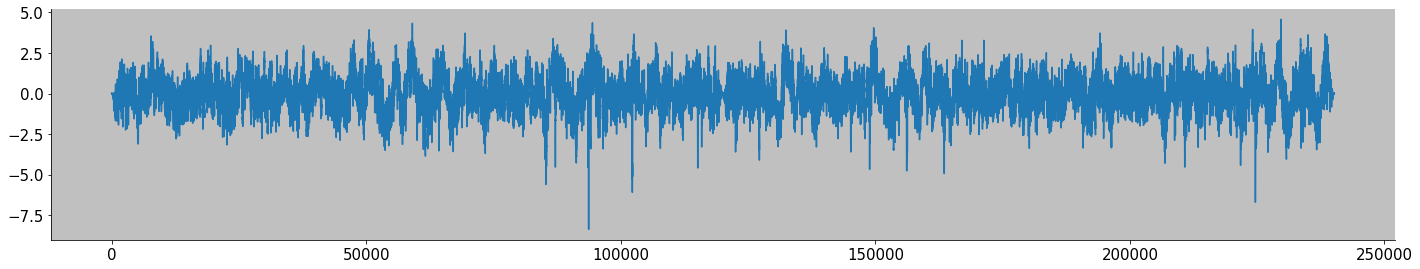

In [289]:
#print(dat_11['V'][:,0].shape)
plt.plot(dat_11['V'][:,7])

In [292]:
print(dat_11['t_on'])

[  6721   8921  11121  13321  15521  17721  19921  22121  24321  26521
  28721  30921  33121  35321  37521  39721  41921  44121  46321  48521
  50721  52921  55121  57321  59521  61721  63921  66121  68321  70521
  72721  74921  77121  79321  81521  83721  85921  88121  90321  92521
  94721  96921  99121 101321 103521 105721 107921 110121 112321 114521
 126801 129001 131201 133401 135601 137801 140001 142201 144401 146601
 148801 151001 153201 155401 157601 159801 162001 164201 166401 168601
 170801 173001 175201 177401 179601 181801 184001 186201 188401 190601
 192801 195001 197201 199401 201601 203801 206001 208201 210401 212601
 214801 217001 219201 221401 223601 225801 228001 230201 232401 234601]


In [ ]:
for i in 

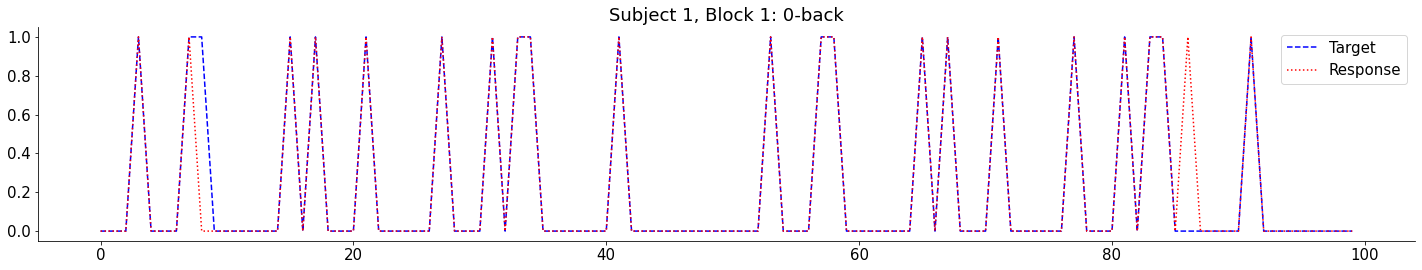

Patient responded to 21 out of 22 targets, with an accuracy of 0.9545454545454546


In [102]:
dat_11 = alldat[1][1]
target = (dat_11['target'])
response = (dat_11['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title('Subject 1, Block 1: 0-back')
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

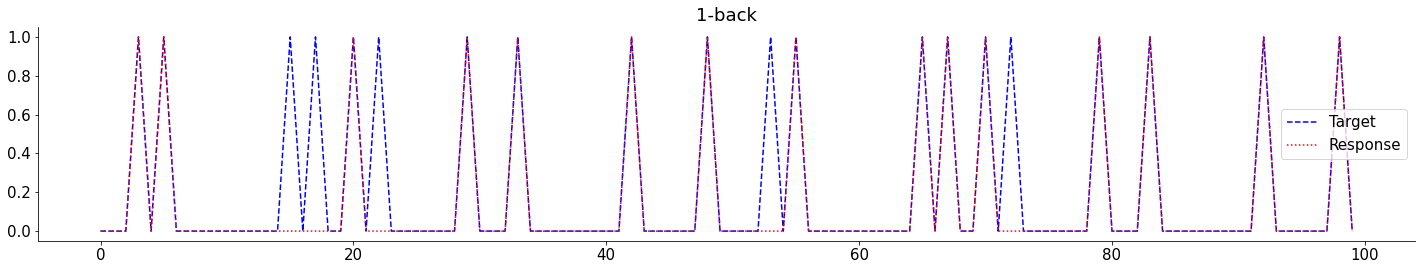

Patient responded to 15 out of 20 targets, with an accuracy of 0.75


In [89]:
dat_12 = alldat[1][2]
target = (dat_12['target'])
response = (dat_12['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_12['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

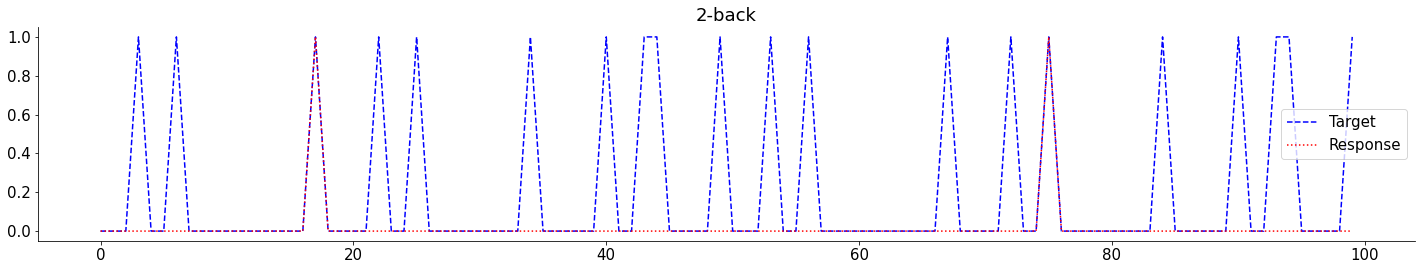

Patient responded to 2 out of 20 targets, with an accuracy of 0.1


In [93]:
dat_13 = alldat[1][3]
target = (dat_13['target'])
response = (dat_13['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_13['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

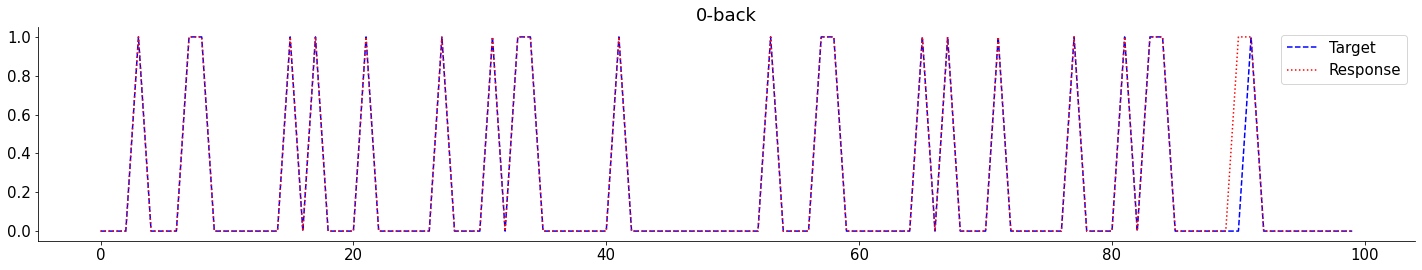

Patient responded to 22 out of 22 targets, with an accuracy of 1.0


In [94]:
dat_01 = alldat[0][1]
target = (dat_01['target'])
response = (dat_01['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_01['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

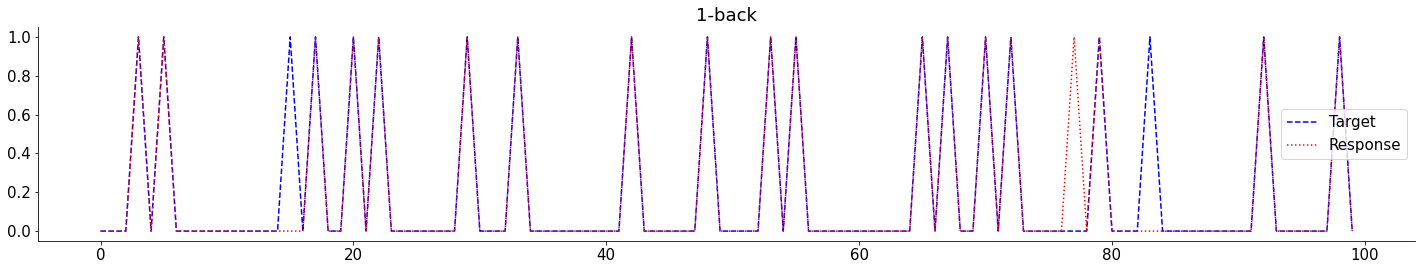

Patient responded to 18 out of 20 targets, with an accuracy of 0.9


In [95]:
dat_02 = alldat[0][2]
target = (dat_02['target'])
response = (dat_02['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_02['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

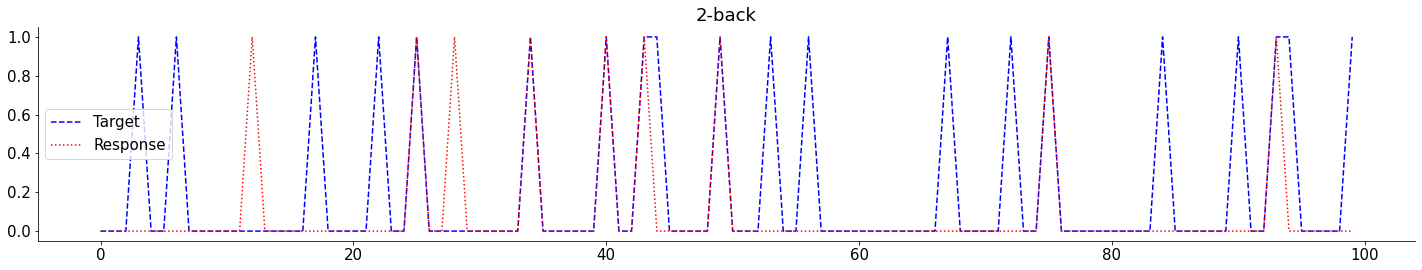

Patient responded to 7 out of 20 targets, with an accuracy of 0.35


In [96]:
dat_03 = alldat[0][3]
target = (dat_03['target'])
response = (dat_03['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_03['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

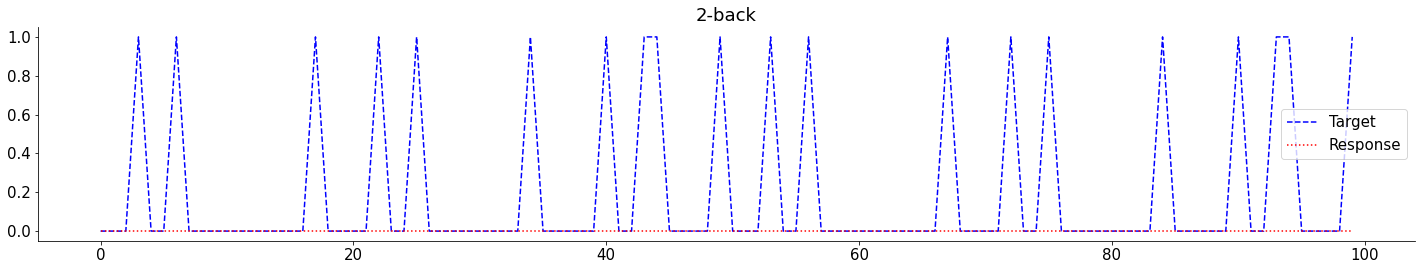

Patient responded to 0 out of 20 targets, with an accuracy of 0.0


In [101]:
dat_23 = alldat[2][3]
target = (dat_23['target'])
response = (dat_23['response'])
plt.plot(target, 'b--', markersize = 10, label = 'Target')
plt.plot(response, 'r:', markersize = 10, label = 'Response')
plt.legend()
plt.title(dat_23['expinfo'])
plt.show()


correct = 0
for i in range(0,99):
    if target[i] == 1 and response[i] == 1:
        correct = correct + 1
    else:
        correct = correct + 0

accuracy = correct/sum(target)
print('Patient responded to', correct, 'out of',sum(target),'targets, with an accuracy of',accuracy)

In [107]:
stim_id = (dat_11['stim_id'])
print(stim_id)

[23 30  7 10 20 24 14 10 10 26 29 38 25  1 28 10 21 10 15 18 35 10  9 32
  6 34  3 10 37 27  2 10 39 10 10 13 31  5 11 22  8 10 40 36  4 19 17 12
 33 16 23 30  7 10 20 24 14 10 10 26 29 38 25  1 28 10 21 10 15 18 35 10
  9 32  6 34  3 10 37 27  2 10 39 10 10 13 31  5 11 22  8 10 40 36  4 19
 17 12 33 16]
(100,)


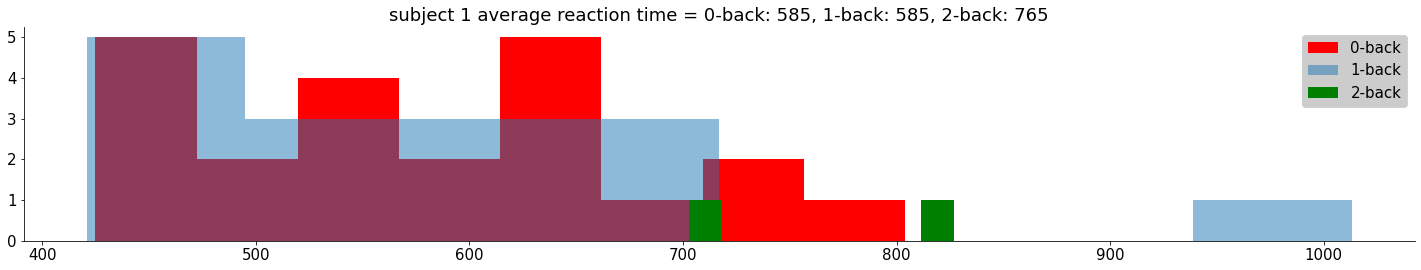

In [170]:
rt_11 = (dat_11['rt'])
rt_12 = (dat_12['rt'])
rt_13 = (dat_13['rt'])
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")
plt.hist(rt_11, bins = 8, color = "red", label = '0-back')
plt.hist(rt_12, bins = 8, alpha = 0.5, label = '1-back')
plt.hist(rt_13, bins = 8, color = "green", label = '2-back')
plt.legend()
plt.title('subject 1 average reaction time = 0-back: 585, 1-back: 585, 2-back: 765')
plt.savefig('RT_subject1.png')
plt.show()

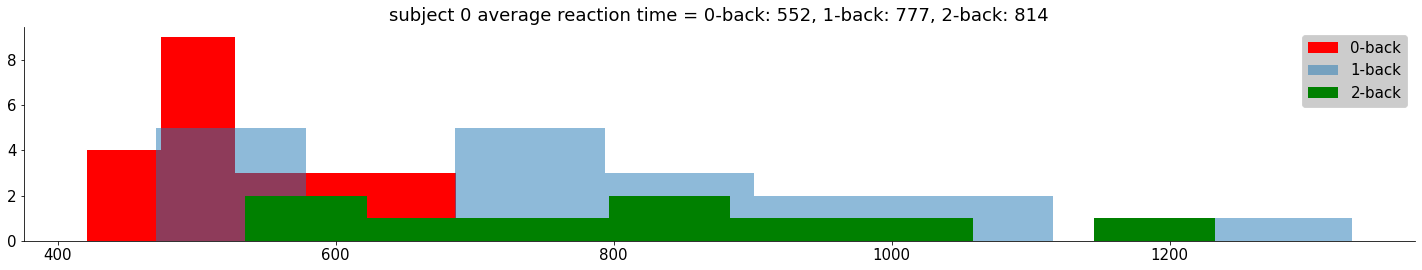

In [169]:
rt_01 = (dat_01['rt'])
rt_02 = (dat_02['rt'])
rt_03 = (dat_03['rt'])
plt.figure(facecolor='white')
ax = plt.axes()
ax.set_facecolor("white")
plt.hist(rt_01, bins = 8, color = "red", label = '0-back')
plt.hist(rt_02, bins = 8, alpha = 0.5, label = '1-back')
plt.hist(rt_03, bins = 8, color = "green", label = '2-back')
plt.legend()
plt.title('subject 0 average reaction time = 0-back: 552, 1-back: 777, 2-back: 814')
plt.savefig('RT_subject0.png')
plt.show()

In [143]:
avg_rt = np.nanmean(rt_03)
print(avg_rt)

813.8888888888889


In [189]:
new_rt_01 = [x for x in rt_01 if math.isnan(x) == False]
new_rt_02 = [x for x in rt_02 if math.isnan(x) == False]
new_rt_03 = [x for x in rt_03 if math.isnan(x) == False]
new_rt_11 = [x for x in rt_11 if math.isnan(x) == False]
new_rt_12 = [x for x in rt_12 if math.isnan(x) == False]
new_rt_13 = [x for x in rt_13 if math.isnan(x) == False]

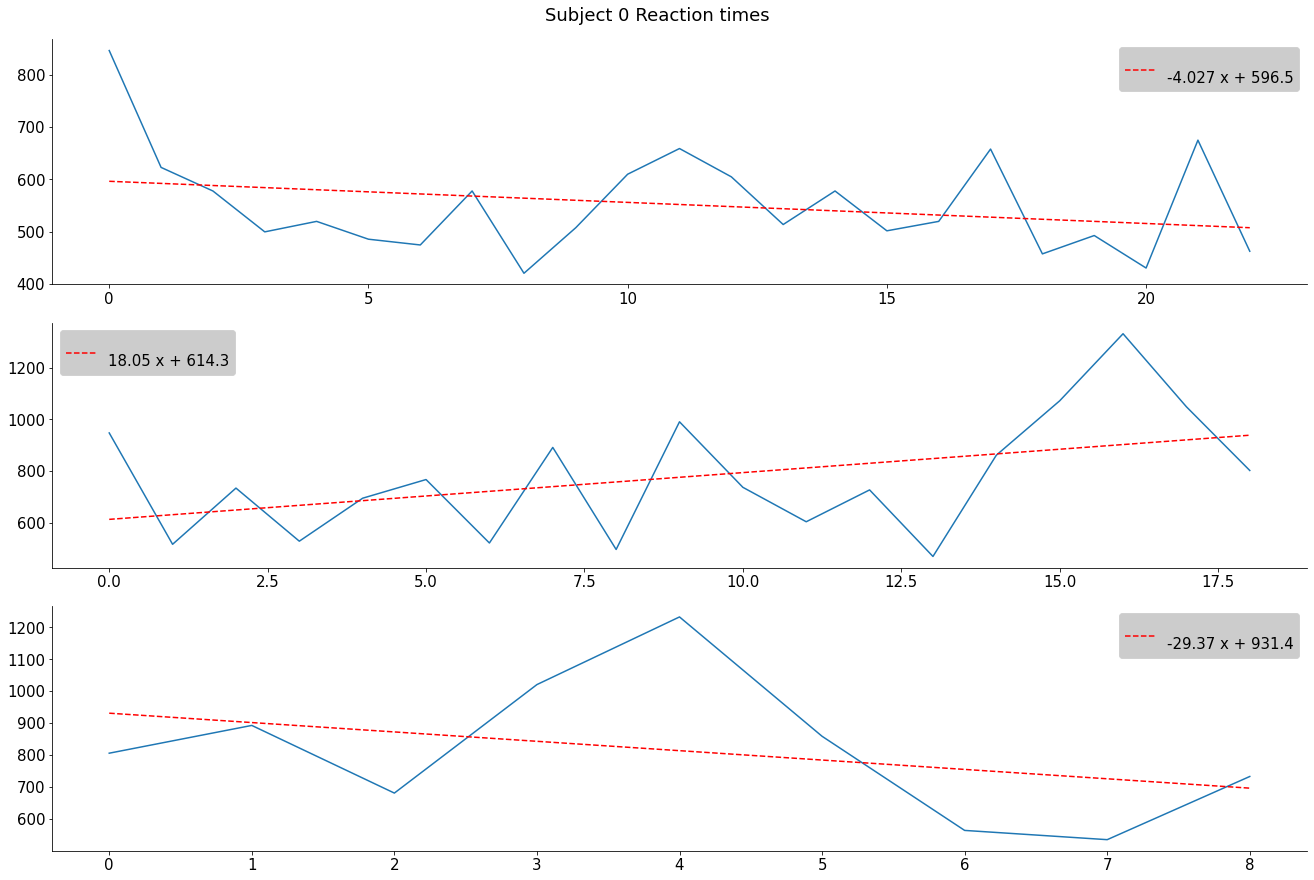

In [276]:
fig, axs = plt.subplots(3,facecolor = 'white')
fig.suptitle('Subject 0 Reaction times')
axs[0].plot(new_rt_01)
axs[0].set_facecolor("white")
X_01 = np.arange(0,len(new_rt_01),1)
z_01 = np.polyfit(X_01, new_rt_01, 1)
p_01 = np.poly1d(z_01)
axs[0].plot(X_01,p_01(X_01),"r--", label = p_01)
axs[0].legend()

axs[1].plot(new_rt_02)
axs[1].set_facecolor("white")
X_02 = np.arange(0,len(new_rt_02),1)
z_02 = np.polyfit(X_02, new_rt_02, 1)
p_02 = np.poly1d(z_02)
axs[1].plot(X_02,p_02(X_02),"r--", label = p_02)
axs[1].legend()

axs[2].plot(new_rt_03)
axs[2].set_facecolor("white")
X_03 = np.arange(0,len(new_rt_03),1)
z_03 = np.polyfit(X_03, new_rt_03, 1)
p_03 = np.poly1d(z_03)
axs[2].plot(X_03,p_03(X_03),"r--", label = p_03)
axs[2].legend()

fig.set_size_inches(18.5, 12.5)
plt.savefig('RT_trends_subject0.png')
plt.show()

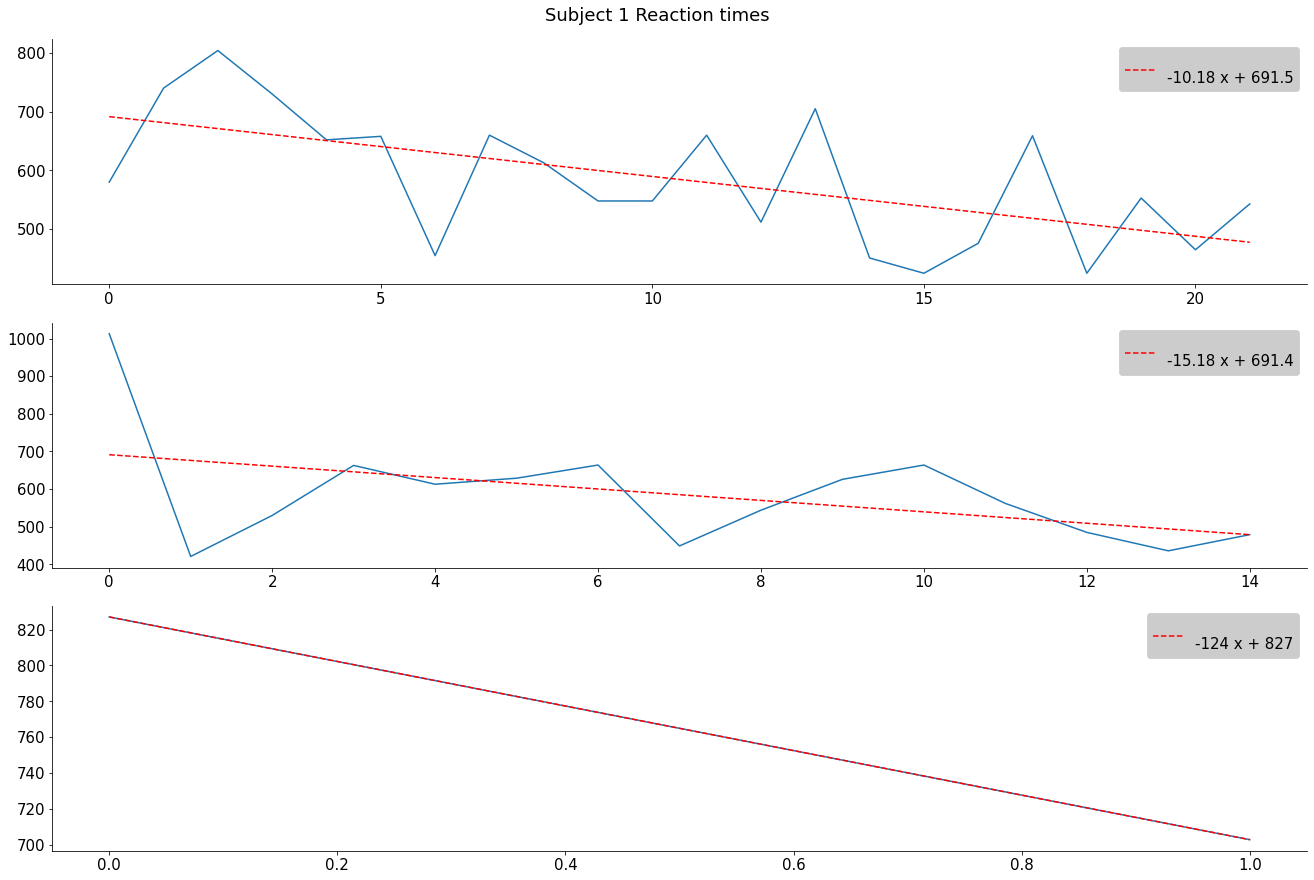

In [277]:
fig, axs = plt.subplots(3, facecolor = 'white')
fig.suptitle('Subject 1 Reaction times')
axs[0].plot(new_rt_11)
axs[0].set_facecolor("white")
X_11 = np.arange(0,len(new_rt_11),1)
z_11 = np.polyfit(X_11, new_rt_11, 1)
p_11 = np.poly1d(z_11)
axs[0].plot(X_11,p_11(X_11),"r--", label = p_11)
axs[0].legend()

axs[1].plot(new_rt_12)
axs[1].set_facecolor("white")
X_12 = np.arange(0,len(new_rt_12),1)
z_12 = np.polyfit(X_12, new_rt_12, 1)
p_12 = np.poly1d(z_12)
axs[1].plot(X_12,p_12(X_12),"r--", label = p_12)
axs[1].legend()

axs[2].plot(new_rt_13)
axs[2].set_facecolor("white")
X_13 = np.arange(0,len(new_rt_13),1)
z_13 = np.polyfit(X_13, new_rt_13, 1)
p_13 = np.poly1d(z_13)
axs[2].plot(X_13,p_13(X_13),"r--", label = p_13)
axs[2].legend()

fig.set_size_inches(18.5, 12.5)
plt.savefig('RT_trends_subject1.png')
plt.show()

In [431]:
dat = alldat[0][2]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)
V = V[:,29]

#divide into trials
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange

V_epochs = np.reshape(V[ts], (nstim, 2000))


In [432]:
# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials
V_resp = (V_epochs[dat['response'] == 1])
V_base = (V_epochs[dat['target'] == 0])

V_resp_mean = (V_epochs[dat['response'] == 1]).mean(0)
V_base_mean = (V_epochs[dat['target'] == 0]).mean(0)

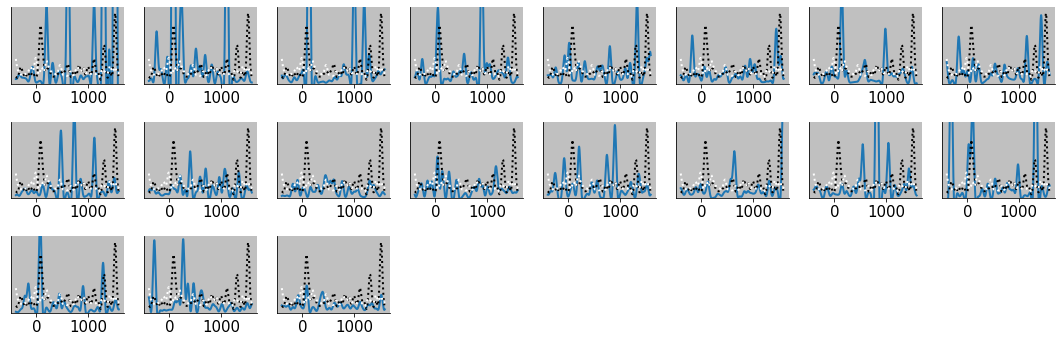

In [433]:
plt.figure(figsize=(15, 5))
for j in range(len(V_resp)):
    ax = plt.subplot(3, 8, j+1)
    plt.plot(trange, V_resp[j,:], lw=2)
    plt.plot(trange, V_resp_mean,'k:', lw=2)
    plt.plot(trange, V_base_mean, 'w:', lw=2)
    #plt.plot(trange, V_base[j,:], lw=2)
    #plt.title('ch%d'%j)
    plt.yticks([])
    plt.ylim([0, 6])
plt.show()


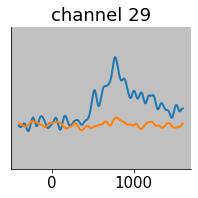

In [358]:
plt.figure(figsize=(3, 3))
plt.plot(trange, V_resp[:, 29], lw=2)
plt.plot(trange, V_base[:, 29], lw=2)
plt.title('channel 29')
plt.yticks([])
plt.ylim([0, 3])
plt.show()

In [401]:
dat = alldat[1][2]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)
V = V[:,29]

#divide into trials
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange

V_epochs = np.reshape(V[ts], (nstim, 2000))


In [402]:
# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials
V_resp = (V_epochs[dat['response'] == 1])
V_base = (V_epochs[dat['response'] == 0])

V_resp_mean = (V_epochs[dat['response'] == 1]).mean(0)
V_base_mean = (V_epochs[dat['response'] == 0]).mean(0)

IndexError: index 15 is out of bounds for axis 0 with size 15

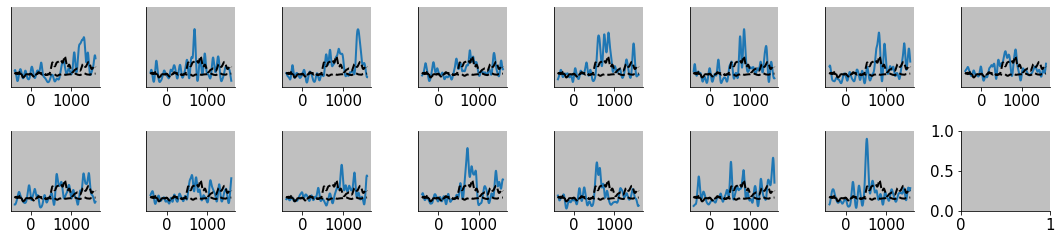

In [403]:
plt.figure(figsize=(15, 5))
for j in range(22):
    ax = plt.subplot(3, 8, j+1)
    plt.plot(trange, V_resp[j,:], lw=2)
    plt.plot(trange, V_resp_mean,'k--', lw=2)
    plt.plot(trange, V_base_mean, 'k--', lw=2)
    #plt.plot(trange, V_base[j,:], lw=2)
    #plt.title('ch%d'%j)
    plt.yticks([])
    plt.ylim([0, 6])
plt.show()


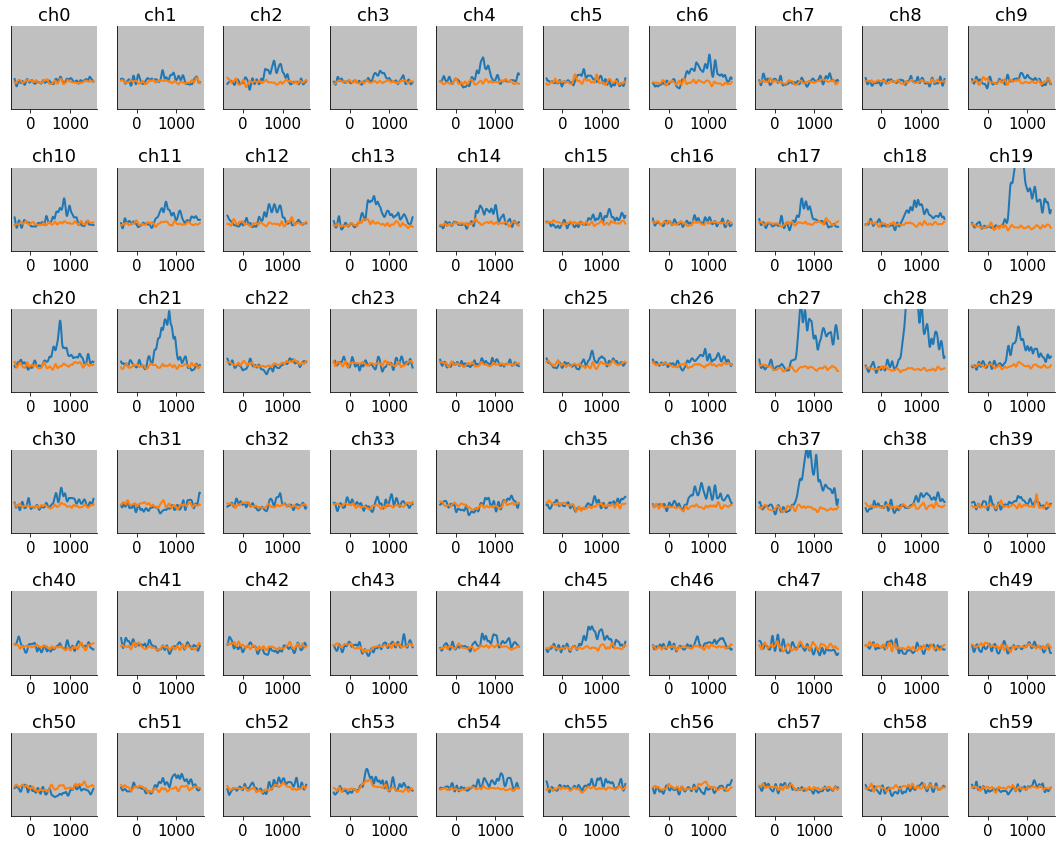

In [338]:
dat = alldat[1][1]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

#divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['response'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

In [ ]:
from nilearn import plotting
from nimare import utils

plt.figure(figsize=(8, 8))
locs = dat_11['locs']
view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color='purple',
                             marker_size=5)
view

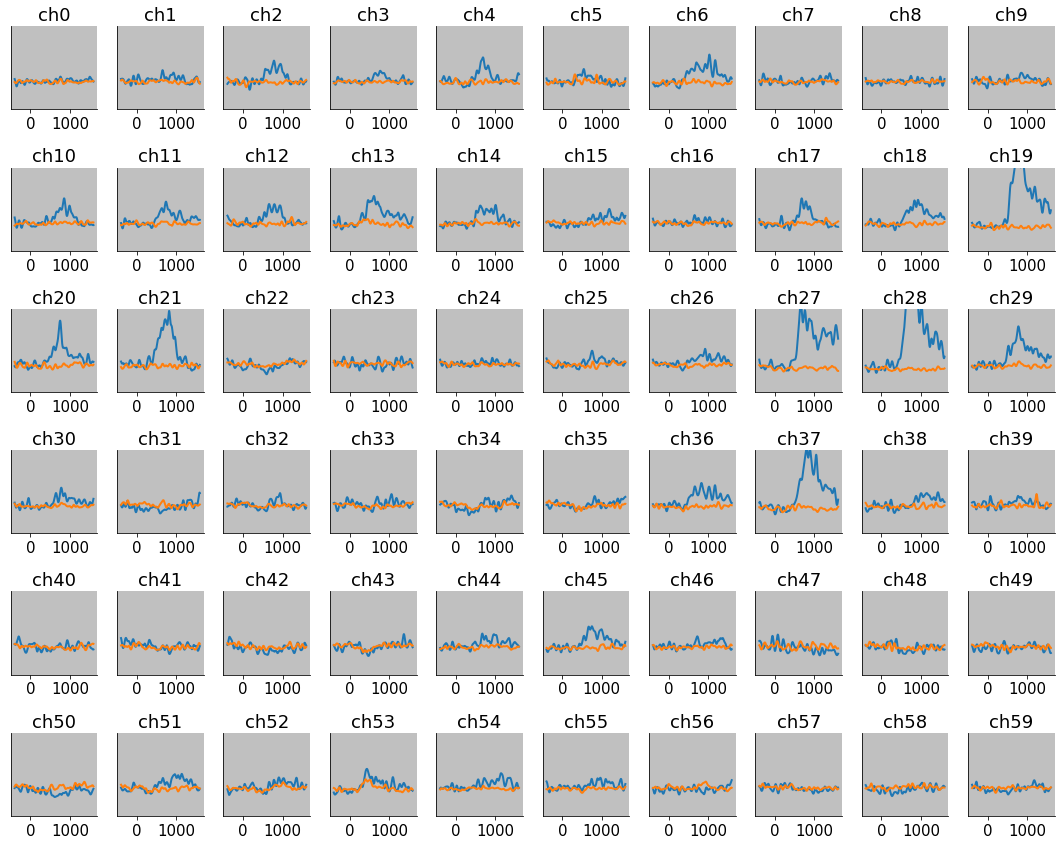

In [434]:
# compute spectral power above 50Hz and low-pass below 10Hz
# power is always positive, so we normalize it by its average

# pick subject 1 and experiment 1
dat = alldat[1][1]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

#divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

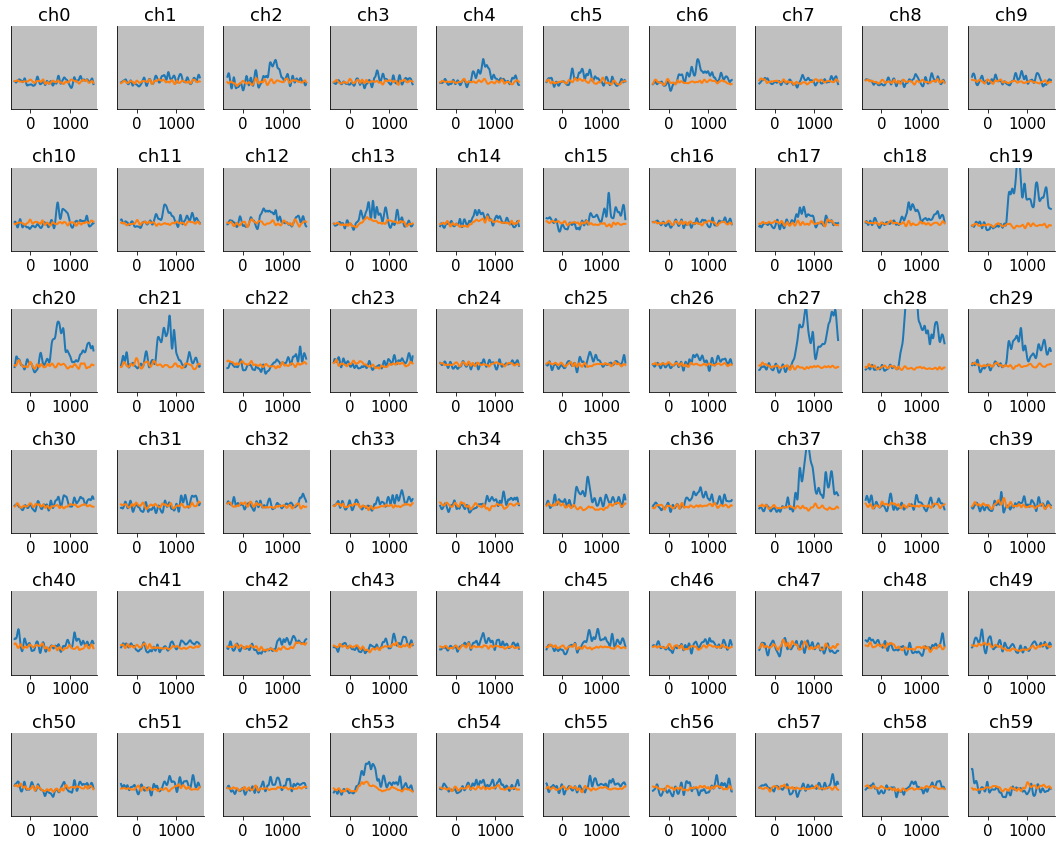

In [435]:
# pick subject 1 and experiment 2
dat = alldat[1][2]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

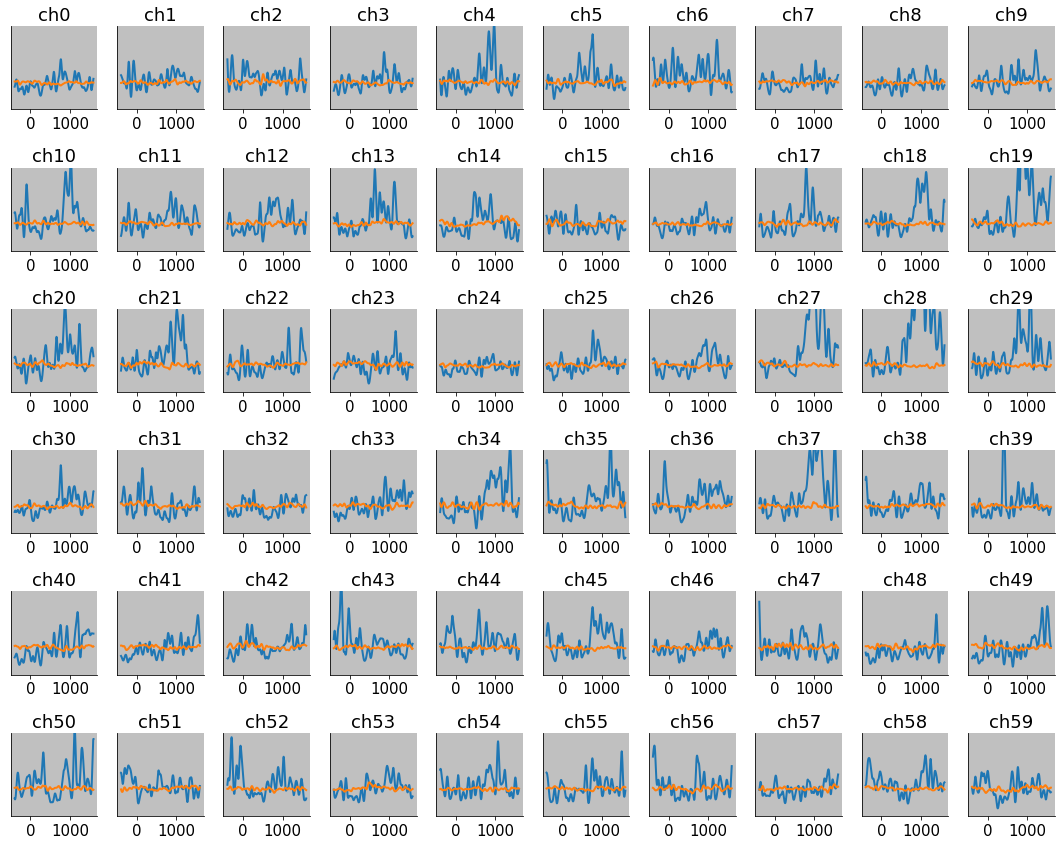

In [436]:
# pick subject 1 and experiment 3
dat = alldat[1][3]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

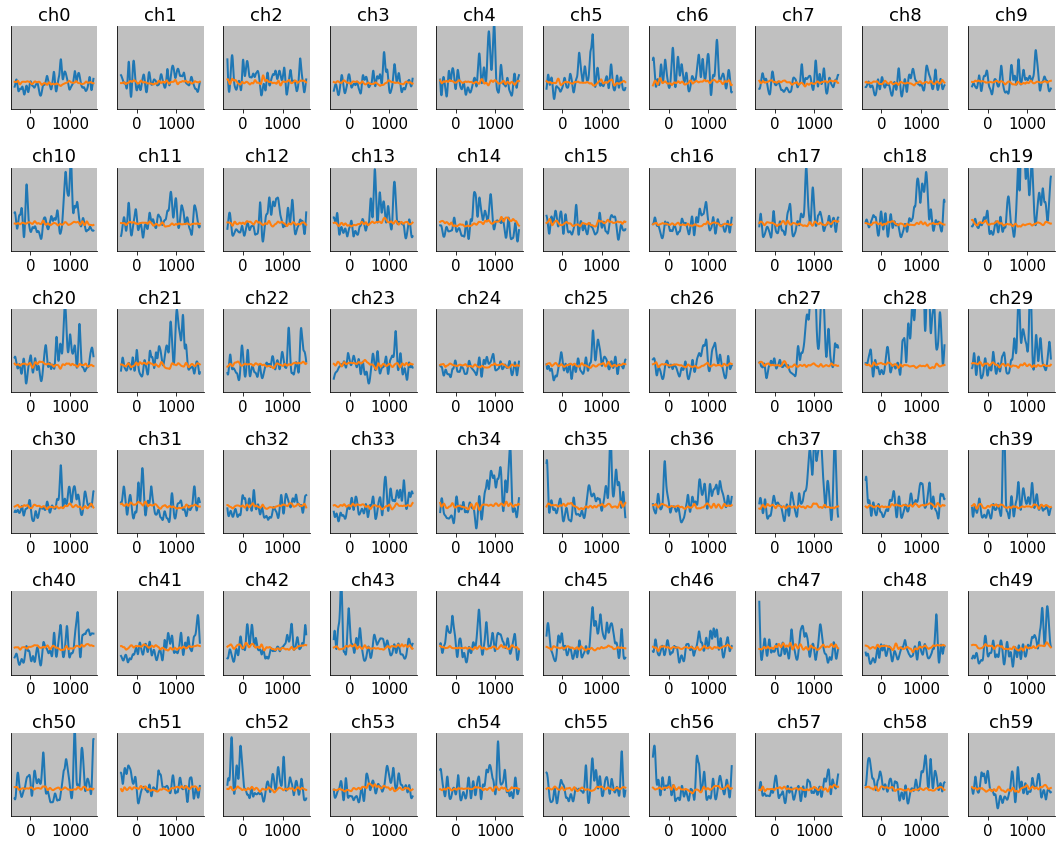

In [438]:
# pick subject 1 and experiment 3
dat = alldat[1][3]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['response'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

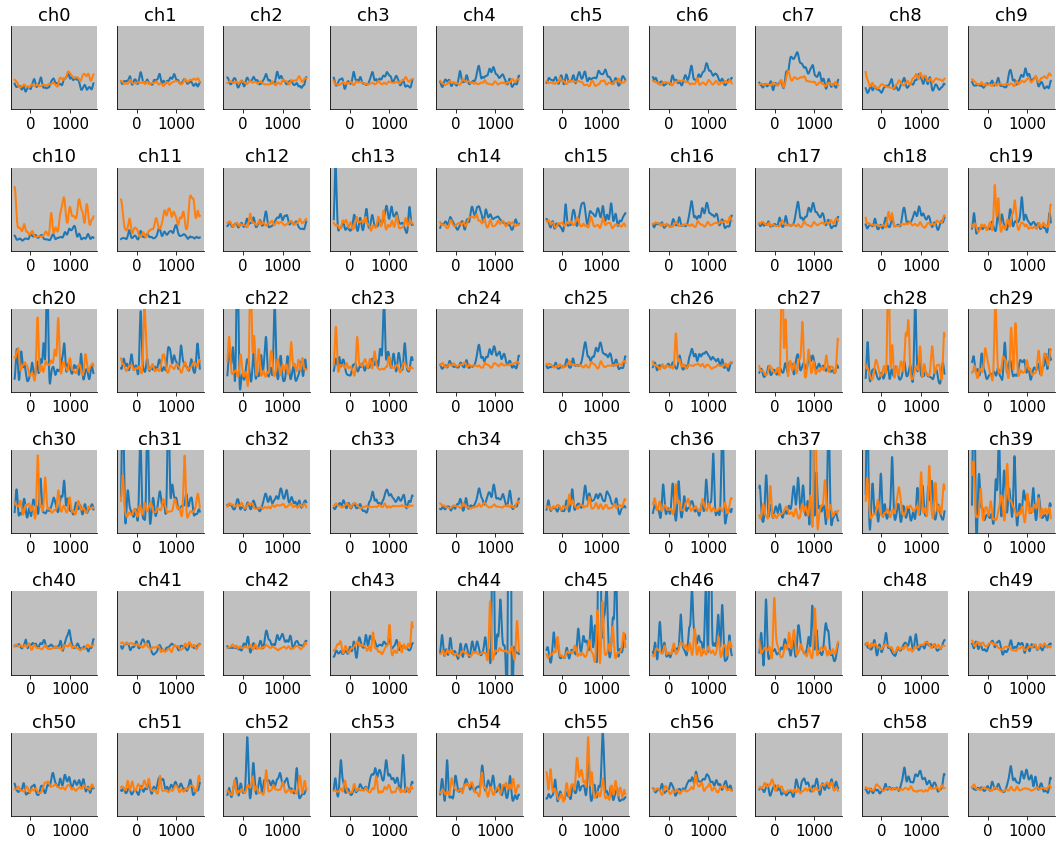

In [439]:
# pick subject 0 and experiment 1
dat = alldat[0][1]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

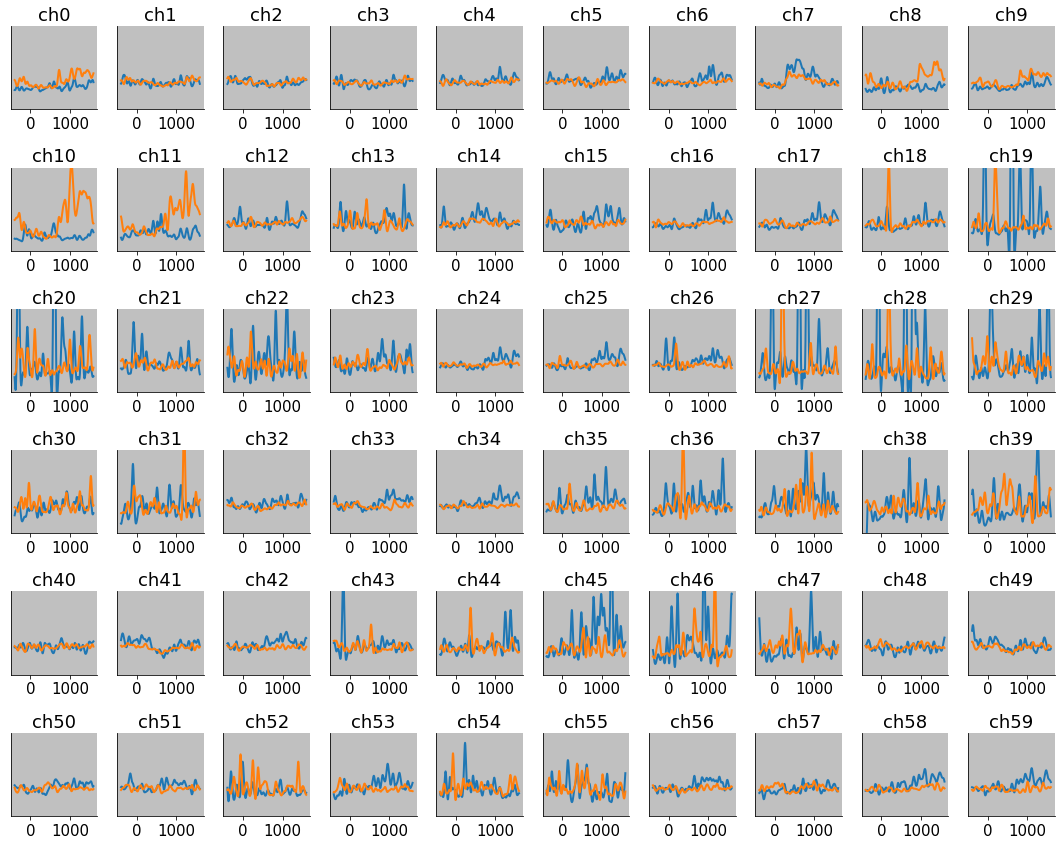

In [440]:
# pick subject 0 and experiment 2
dat = alldat[0][2]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

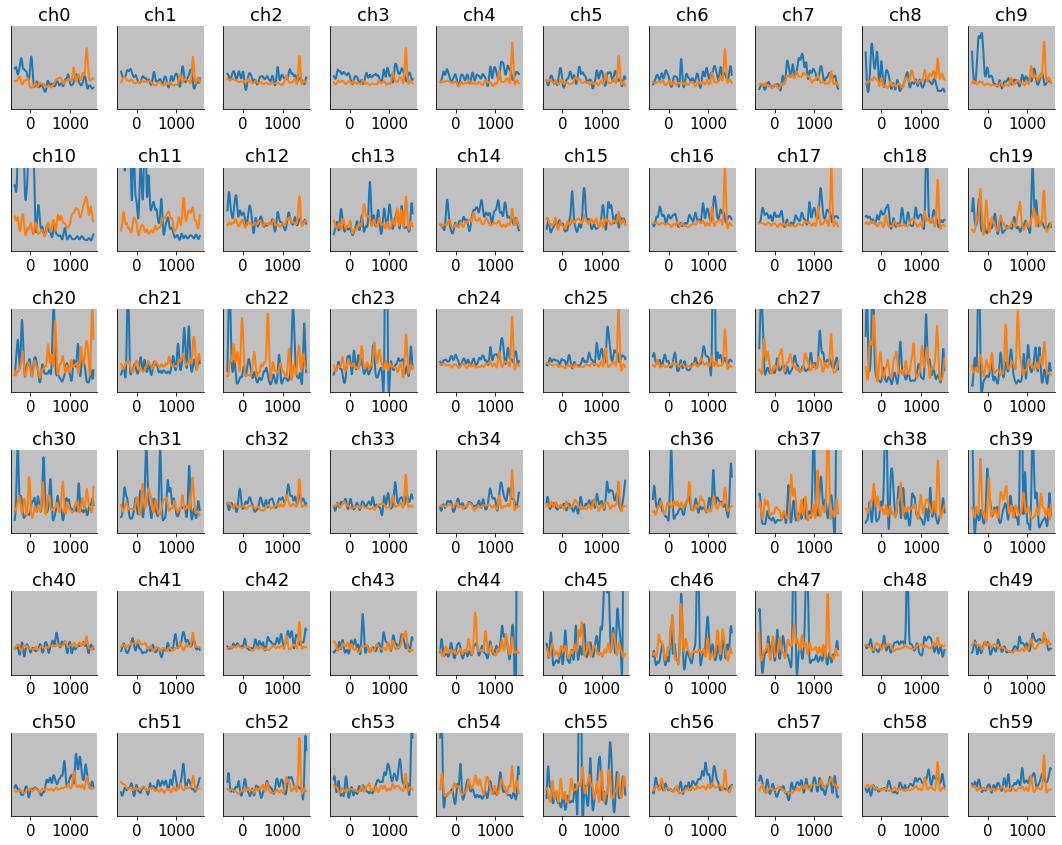

In [441]:
# pick subject 1 and experiment 2
dat = alldat[0][3]
V = dat['V'].astype('float32') # always convert the voltage data to float32!

# high-pass filter above 50 Hz
b, a = signal.butter(3, [50], btype='high', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# compute smooth envelope of this signal = approx power
V = np.abs(V)**2
b, a = signal.butter(3, [10], btype='low', fs=1000)
V = signal.filtfilt(b, a, V, 0)

# normalize each channel so its mean power is 1
V = V/V.mean(0)

# divide into trials and average
nt, nchan = V.shape
nstim = len(dat['t_on'])

# use a timerange from 400ms before to 1600ms after the stimulus onset
trange = np.arange(-400, 1600)
ts = dat['t_on'][:, np.newaxis] + trange
V_epochs = np.reshape(V[ts, :], (nstim, 2000, nchan))

V_resp = (V_epochs[dat['response'] == 1]).mean(0)
V_base = (V_epochs[dat['target'] == 0]).mean(0)

# let's find the electrodes that distinguish responses from non-responses
# note these are event-related potentials

plt.figure(figsize=(15, 12))
for j in range(60):
  ax = plt.subplot(6, 10, j+1)
  plt.plot(trange, V_resp[:, j], lw=2)
  plt.plot(trange, V_base[:, j], lw=2)
  plt.title('ch%d'%j)
  plt.yticks([])
  plt.ylim([0, 3])
plt.show()

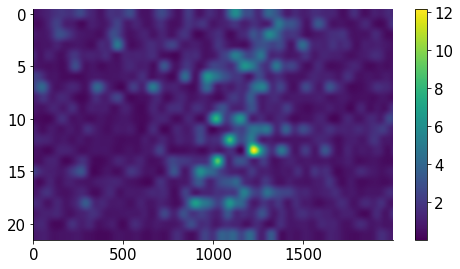

In [299]:
# let's look at all the response trials for the electrode that has a significant response
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[dat['response']==1, :, 21].astype('float32'),
           aspect='auto')
plt.colorbar()
plt.show()

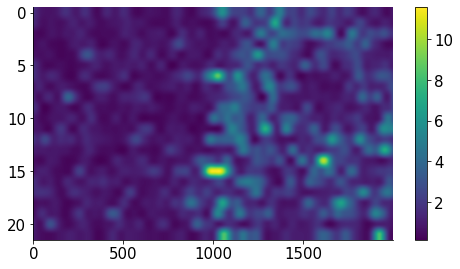

In [300]:
# this electrode has a more transient response
plt.subplot(1, 3, 1)
plt.imshow(V_epochs[dat['response']==1, :, 27].astype('float32'),
           aspect='auto')
plt.colorbar()
plt.show()

In [301]:
for i in range(len(alldat)):
    print('Subject ', i)
    plt.figure(figsize=(8, 8))
    locs = (alldat[i][1])['locs']
    view = plotting.view_markers(utils.tal2mni(locs),
                             marker_labels=['%d'%k for k in np.arange(locs.shape[0])],
                             marker_color='purple',
                             marker_size=5)
    filename = 'subject' + str(i) + '_block1.html'
    view.save_as_html(filename)

Subject  0
Subject  1
Subject  2


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>